# Import Package

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Import Data

In [4]:
df = pd.read_csv("./carprice.csv", index_col="ID")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [5]:
df.shape

(5953, 12)

In [6]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

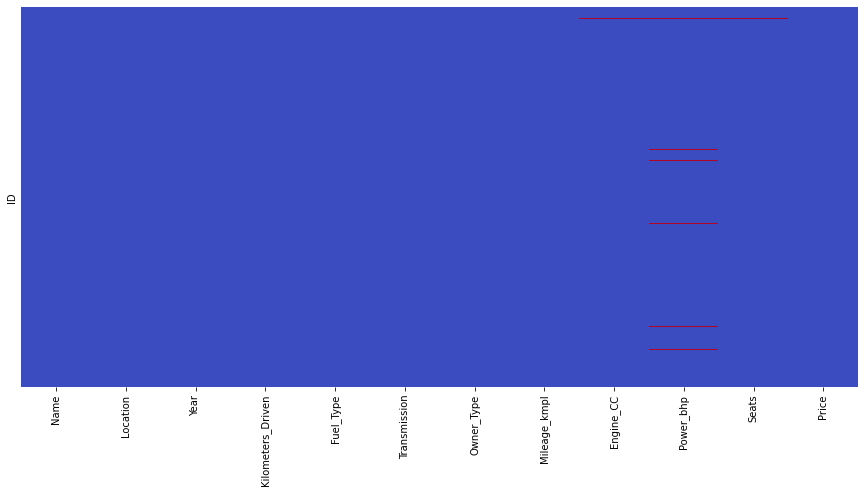

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(5807, 12)

# See Missing Value

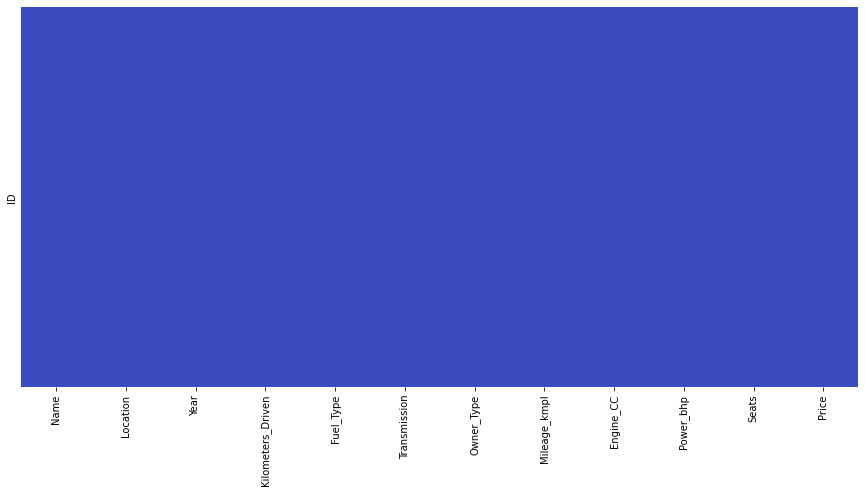

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [11]:
df.drop(columns="Name", inplace=True)

# Splitting Dataset

In [12]:
X = df.drop(columns='Price')
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4064, 10) (1743, 10) (4064,) (1743,)


# Build Model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [15]:
df.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


KNN Model

In [16]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="mean")),
  ('scaler', StandardScaler())
])

cat_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
  ('categorical', cat_pip, ['Location', 'Fuel_Type','Transmission', 'Owner_Type'])
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', KNeighborsRegressor())
])

params = {
    "algo__n_neighbors": np.arange(1, 31, 2),
    "algo__weights": ['uniform', 'distance'],
    "algo__p": [1, 1.5, 2]
}

model_KNN = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model_KNN.fit(X_train, y_train)

print(model_KNN.best_params_)
print(model_KNN.score(X_train, y_train), model_KNN.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 13, 'algo__p': 1.5, 'algo__weights': 'distance'}
0.9999963562678225 0.8422500866379176


# SVM

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [18]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('scaler', StandardScaler())
])

cat_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
  ('categorical', cat_pip, ['Location', 'Fuel_Type','Transmission', 'Owner_Type'])
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', SVR(max_iter=500))
])

params = {
    'algo__C': [0.1,1, 10, 100], 
    'algo__gamma': [1,0.1,0.01,0.001],
    'algo__kernel': ['rbf', 'poly', 'sigmoid']
}

model_SVM = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.score(X_test, y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


{'algo__C': 10, 'algo__gamma': 0.1, 'algo__kernel': 'rbf'}
0.8729281498232988 0.8430844254654806


# RandomForest

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [20]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('scaler', StandardScaler())
])

cat_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
  ('categorical', cat_pip, ['Location', 'Fuel_Type','Transmission'])
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

In [21]:
params = {
    "algo__n_estimators": [100, 150, 200],
    "algo__max_depth": [20, 50, 80],
    "algo__max_features": [0.3, 0.6, 0.8],
    "algo__min_samples_leaf": [1, 5, 10]
}

model_randf = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model_randf.fit(X_train, y_train)

print(model_randf.best_params_)
print(model_randf.score(X_train, y_train), model_randf.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 80, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9856349260189127 0.8809983610950508


In [ ]:
!pip install luwiji

In [23]:
from jcopml.feature_importance import mean_score_decrease

# df_imp = mean_score_decrease(X_train, y_train, model_randf, plot=True, topk=10)

# XGBoost

In [24]:
from xgboost import XGBRFRegressor

In [25]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('scaler', StandardScaler())
])

cat_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="most_frequent")),
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
  ('categorical', cat_pip, ['Location', 'Fuel_Type','Transmission'])
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', XGBRFRegressor(n_jobs=-1, random_state=42))
])

params = {
    "algo__max_depth": [3, 6, 10],
    "algo__colsample_bytree": [0.4, 0.6, 0.8],
    "algo__n_estimators": [100, 150, 200],
    "algo__subsample": [0.4, 0.6, 0.8],
    "algo__gamma": [1, 5, 10],
    "algo__learning_rate": [0.01, 0.1, 1],
    "algo__reg_alpha": [0.01, 0.1, 10],
    "algo__reg_lambda": [0.01, 0.1, 10]
}

model_xgboost = RandomizedSearchCV(pipeline, params, n_iter=100,cv=3, n_jobs=-1, verbose=1)
model_xgboost.fit(X_train, y_train)

print(model_xgboost.best_params_)
print(model_xgboost.score(X_train, y_train), model_xgboost.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[16:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'algo__subsample': 0.6, 'algo__reg_lambda': 0.1, 'algo__reg_alpha': 0.1, 'algo__n_estimators': 200, 'algo__max_depth': 10, 'algo__learning_rate': 1, 'algo__gamma': 1, 'algo__colsample_bytree': 0.8}
0.956499528372408 0.8751354710849686


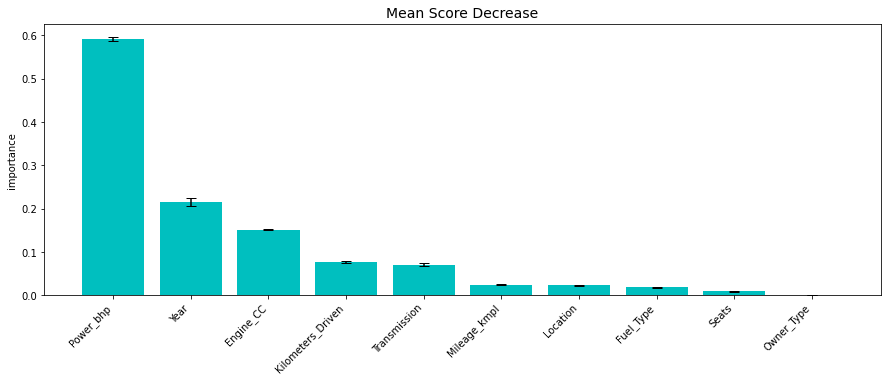

In [26]:
df_imp = mean_score_decrease(X_train, y_train, model_xgboost, plot=True, topk=10)

# Plots All Model

In [27]:
knn = model_KNN.score(X_test, y_test)
svm = model_SVM.score(X_test, y_test)
random_forest = model_randf.score(X_test, y_test)
xgboost = model_xgboost.score(X_test, y_test)

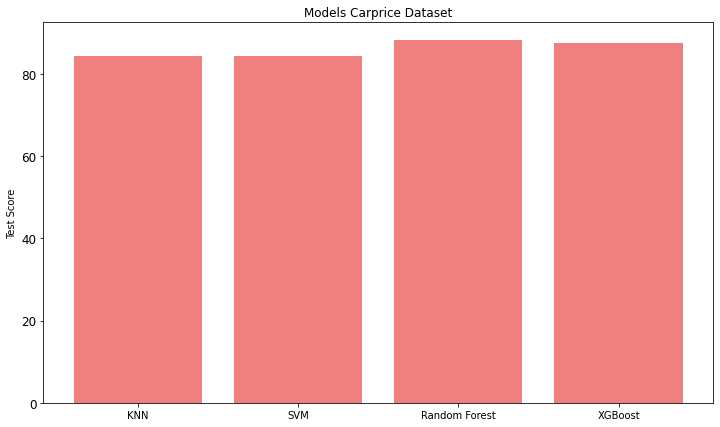

In [32]:
model = ['KNN', 'SVM','Random Forest', 'XGBoost']
score = [knn*100, svm*100, random_forest*100, xgboost*100]

plt.figure(figsize=(12,7))
plt.bar(model, score, color='lightcoral')

plt.title('Models Carprice Dataset')
plt.ylabel('Test Score')
plt.yticks(size=12)

plt.show()

# Save Models

In [34]:
import pickle
filename = 'carprice_regression_model.sav'
pickle.dump(model_randf, open(filename, 'wb'))

# Load Model

In [36]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8809983610950508
